In [41]:
''' 
주소를 변환하여 위도, 경도를 매기는 작업은 생략하겠습니다.
원본데이터에서 너무 많이 변환하는 바람에 index순서가 바뀌어서 샘플로 지금까지 과정을 재현하겠습니다. 
일부 과정이 생략되어있습니다.
'''

import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('sample.csv')
df.drop(columns='Unnamed: 0', inplace=True) #데이터를 불러옵니다.

In [43]:
df.head()

,Date,Name,Year,Month,Gu,Dong,Address,Longitude,Latitude,major,Building Year,Floor,Actual Price Index,Living Price Index,Interest Rate,Jeonse Index,Price,Area
0,20231231,블루힐하우스,2023,202312,서초구,잠원동,서초구 잠원동 0071-0001,127.005990,37.511931,0,24,2,156.7,115.22,3.5,53.7,182000,84.54
1,20231231,극동,2023,202312,서대문구,홍은동,서대문구 홍은동 0454-0000,126.950870,37.602631,0,28,13,156.7,115.22,3.5,53.7,50000,84.92
2,20231231,e편한세상상도노빌리티,2023,202312,동작구,상도동,동작구 상도동 0903-0000,126.948130,37.505278,2,5,15,156.7,115.22,3.5,53.7,147500,84.97
3,20231231,화랑대디오베이션,2023,202312,노원구,공릉동,노원구 공릉동 0760-0000,127.082217,37.620393,0,2,7,156.7,115.22,3.5,53.7,59900,59.99
4,20231231,율창,2023,202312,강서구,화곡동,강서구 화곡동 0888-0001,126.850504,37.528725,0,20,4,156.7,115.22,3.5,53.7,32400,79.66


<Axes: >

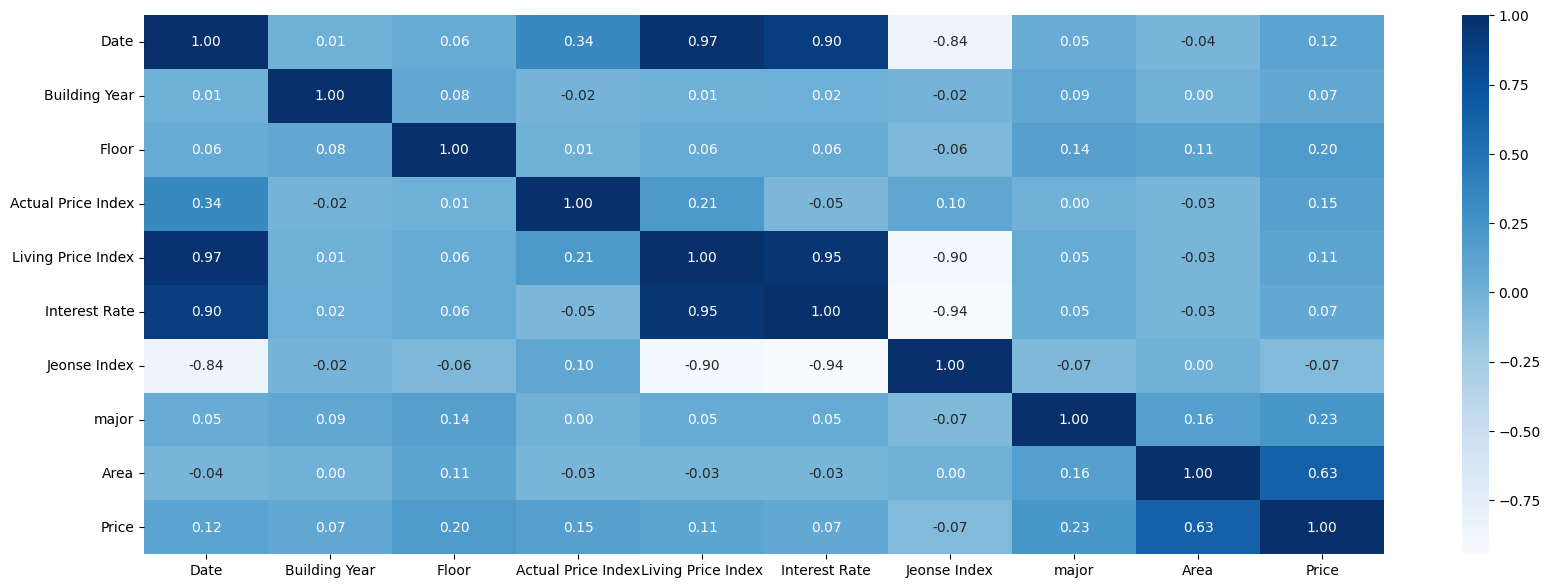

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df[['Date', 'Building Year', 'Floor', 'Actual Price Index', 'Living Price Index', 'Interest Rate','Jeonse Index', 'major', 'Area', 'Price']].corr() #상관관계 함수를 정의합니다

plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues") #상관계수를 히트맵으로 불러옵니다.

In [45]:
'''
Price와 Area의 상관관계가 매우 높은것을 확인 할 수 있습니다 (0.63)
이런 상관계수는 과적합을 유발할 수 있어서 타켓변수를 변경하였습니다.
'''

df['Price per Area'] = df['Price']/df['Area']

C:\Users\LSNAu\AppData\Local\Temp\ipykernel_38920\1353254039.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price per Area'], shade=True, color='skyblue')


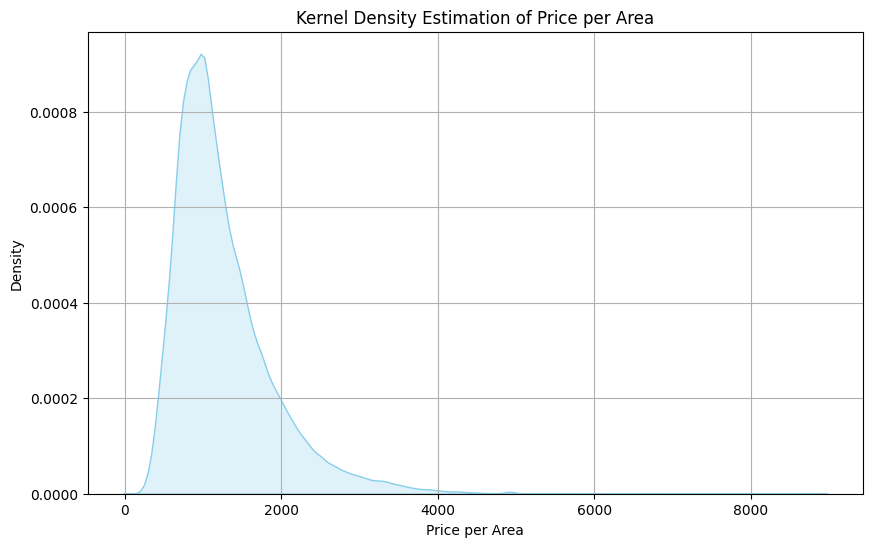

In [46]:
#이번엔 Price per Area의 분포를 KDE 플롯으로 확인해 보았습니다.

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price per Area'], shade=True, color='skyblue')
plt.title('Kernel Density Estimation of Price per Area')
plt.xlabel('Price per Area')
plt.ylabel('Density')
plt.grid(True)
plt.show()

C:\Users\LSNAu\AppData\Local\Temp\ipykernel_38920\1665342513.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price per Area Log Scale'], shade=True, color='skyblue')


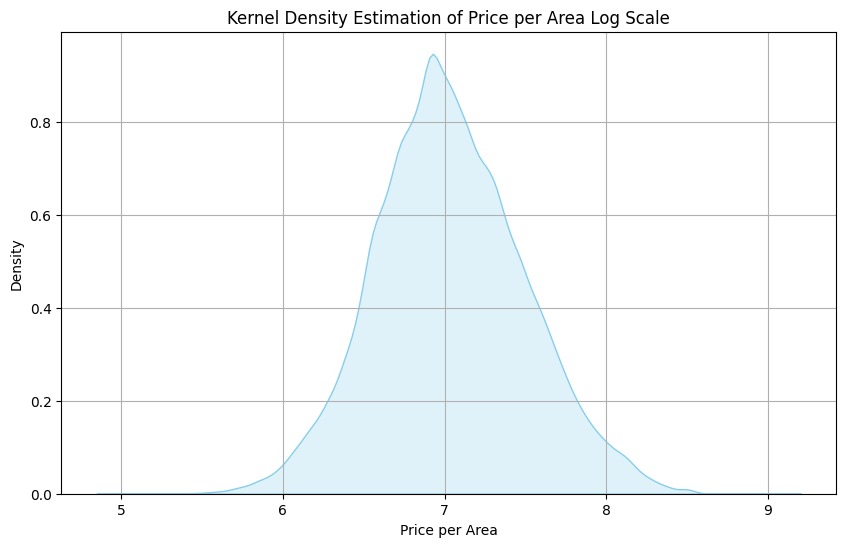

In [47]:
#첨도와 왜도가 높아 로그스케일로 변환하였습니다.

df['Price per Area Log Scale'] = np.log1p(df['Price per Area']) #결측치나 0인 값은 없지만 혹시 모를 사태에 대비해 log1p를 사용하였습니다.

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price per Area Log Scale'], shade=True, color='skyblue')
plt.title('Kernel Density Estimation of Price per Area Log Scale')
plt.xlabel('Price per Area')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [48]:
df['Price per Area Log Scale'].describe()

count    187659.000000
mean          7.032799
std           0.459710
min           4.968650
25%           6.719943
50%           7.009681
75%           7.333410
max           9.083940
Name: Price per Area Log Scale, dtype: float64

In [49]:
Population = pd.read_csv('Population.csv',encoding='cp949') #인구데이터를 가져와줍니다.

In [50]:
'''
나이, 성별별로 구분되어 있습니다. 이를 어린이, 청소년, 청년, 중장년, 노년으로 구분지어줍시다.
'''

Population.head()

,법정동코드,기준연월,시도명,시군구명,읍면동명,리명,계,남자,여자,0세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
0,1111010100,2024-01-31,서울특별시,종로구,청운동,청운동,2274,1119,1155,4,...,0,1,0,0,0,0,0,0,0,0
1,1111010200,2024-01-31,서울특별시,종로구,신교동,신교동,1341,600,741,0,...,0,0,0,0,0,0,0,0,0,0
2,1111010300,2024-01-31,서울특별시,종로구,궁정동,궁정동,217,94,123,0,...,0,0,0,0,0,0,0,0,0,0
3,1111010400,2024-01-31,서울특별시,종로구,효자동,효자동,568,261,307,2,...,0,0,0,0,0,0,0,0,0,0
4,1111010500,2024-01-31,서울특별시,종로구,창성동,창성동,404,168,236,1,...,1,0,0,0,0,0,0,0,0,0


In [51]:
population = Population[Population['시도명'] == '서울특별시'] 

population['어린이인구'] = population[[f"{age}세남자" for age in range(13)] + [f"{age}세여자" for age in range(13)]].sum(axis=1)
population['청소년인구'] = population[[f"{age}세남자" for age in range(13, 25)] + [f"{age}세여자" for age in range(13, 25)]].sum(axis=1)
population['청년인구'] = population[[f"{age}세남자" for age in range(25, 41)] + [f"{age}세여자" for age in range(25, 41)]].sum(axis=1)
population['중장년인구'] = population[[f"{age}세남자" for age in range(41, 66)] + [f"{age}세여자" for age in range(41, 66)]].sum(axis=1)
population['노년인구'] = population[[f"{age}세남자" for age in range(66, 109)] + [f"{age}세여자" for age in range(66, 109)]].sum(axis=1)

C:\Users\LSNAu\AppData\Local\Temp\ipykernel_38920\135745077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['어린이인구'] = population[[f"{age}세남자" for age in range(13)] + [f"{age}세여자" for age in range(13)]].sum(axis=1)
C:\Users\LSNAu\AppData\Local\Temp\ipykernel_38920\135745077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['청소년인구'] = population[[f"{age}세남자" for age in range(13, 25)] + [f"{age}세여자" for age in range(13, 25)]].sum(axis=1)
C:\Users\LSNAu\AppData\Local\Temp\ipykernel_

In [52]:
population = population[['읍면동명', '계', '어린이인구', '청소년인구', '청년인구', '중장년인구', '노년인구']]
population2 = population.rename(columns={'읍면동명':'Dong', '계':'Total Population', '어린이인구':'Children', '청소년인구':'Adolescent', '청년인구':'Youth', '중장년인구':'Middle-Aged', '노년인구':'Old Age'})

In [53]:
population2.head()

,Dong,Total Population,Children,Adolescent,Youth,Middle-Aged,Old Age
0,청운동,2274,239,319,412,916,388
1,신교동,1341,96,188,271,579,207
2,궁정동,217,24,38,41,99,15
3,효자동,568,46,59,138,238,87
4,창성동,404,32,34,85,167,86


In [54]:
merged_df = pd.merge(df, population2, on='Dong', how='left') #원본 데이터에 인구 데이터를 합쳐줍시다.

<Axes: >

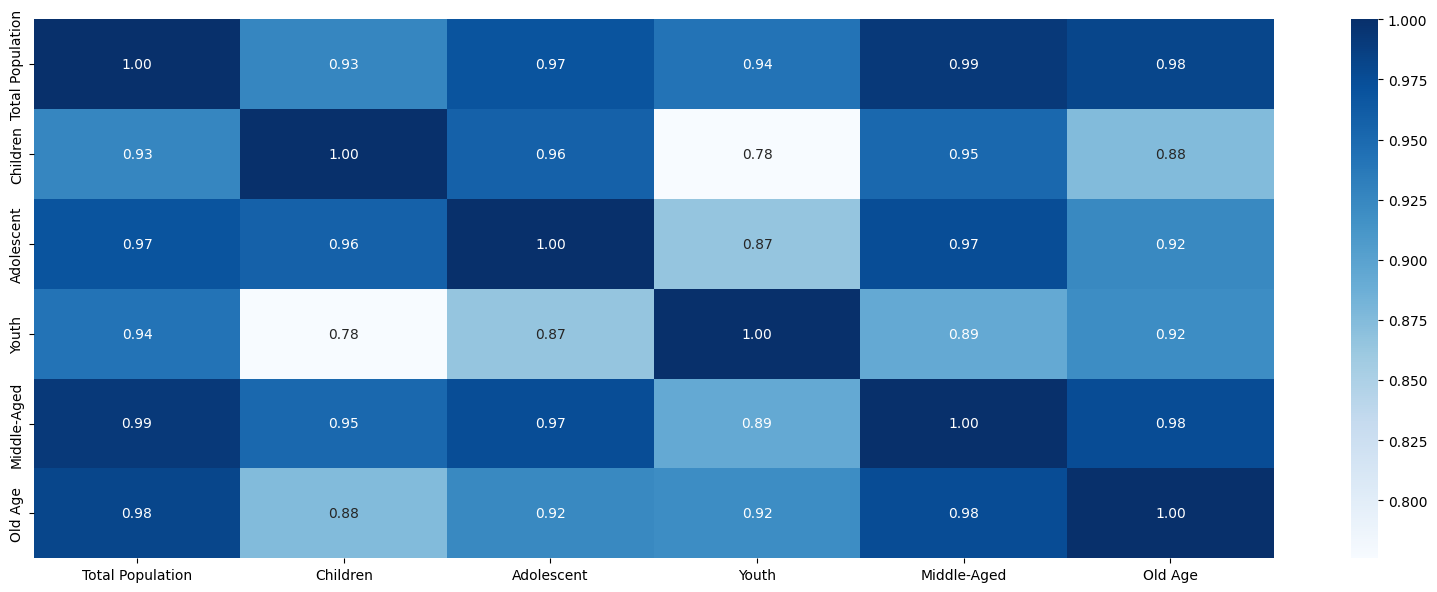

In [57]:
'''
인구수가 서로 높은 상관관계를 보입니다.

독립 변수간의 상관관계가 높으면 과적합 및 모델의 성능이 떨어지므로 

인구수 비율로 바꿉니다.
'''

population_corr = merged_df[['Total Population','Children',	'Adolescent','Youth','Middle-Aged','Old Age']].corr()

plt.figure(figsize=(20,7))
sns.heatmap(population_corr, annot=True, fmt=".2f", cmap="Blues") #상관계수를 히트맵으로 불러옵니다.


In [58]:
merged_df['Children'] = merged_df['Children']/merged_df['Total Population']
merged_df['Youth'] = merged_df['Youth']/merged_df['Total Population']
merged_df['Adolescent'] = merged_df['Adolescent']/merged_df['Total Population']
merged_df['Middle-Aged'] = merged_df['Middle-Aged']/merged_df['Total Population']
merged_df['Old Age'] = merged_df['Old Age']/merged_df['Total Population']

<Axes: >

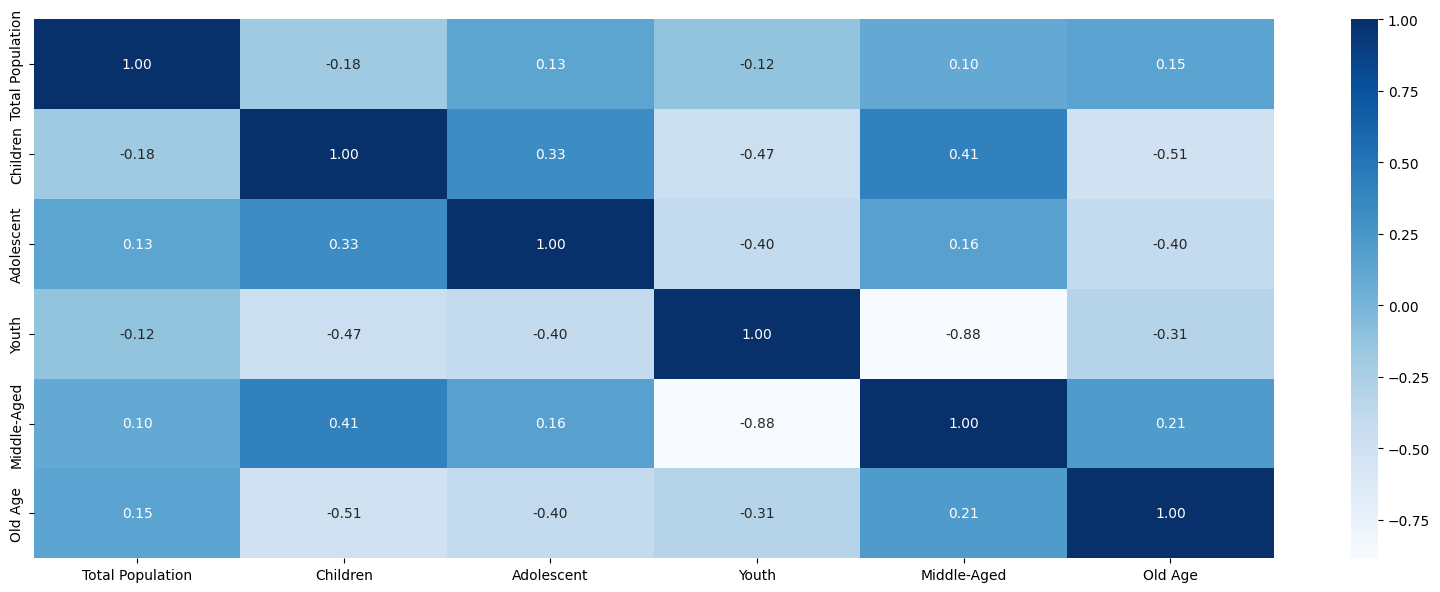

In [60]:
#아까보다 상관관계가 낮아진걸 볼 수 있습니다.

population2_corr = merged_df[['Total Population','Children','Adolescent','Youth','Middle-Aged','Old Age']].corr()

plt.figure(figsize=(20,7))
sns.heatmap(population2_corr, annot=True, fmt=".2f", cmap="Blues") #상관계수를 히트맵으로 불러옵니다.


In [61]:
merged_df.head()

,Date,Name,Year,Month,Gu,Dong,Address,Longitude,Latitude,major,...,Price,Area,Price per Area,Price per Area Log Scale,Total Population,Children,Adolescent,Youth,Middle-Aged,Old Age
0,20231231,블루힐하우스,2023,202312,서초구,잠원동,서초구 잠원동 0071-0001,127.005990,37.511931,0,...,182000,84.54,2152.827064,7.675002,50621,0.107821,0.154027,0.188124,0.420339,0.129670
1,20231231,극동,2023,202312,서대문구,홍은동,서대문구 홍은동 0454-0000,126.950870,37.602631,0,...,50000,84.92,588.789449,6.379766,50678,0.073720,0.115297,0.222128,0.396839,0.191997
2,20231231,e편한세상상도노빌리티,2023,202312,동작구,상도동,동작구 상도동 0903-0000,126.948130,37.505278,2,...,147500,84.97,1735.906791,7.459861,113485,0.071904,0.118174,0.262343,0.373468,0.174111
3,20231231,화랑대디오베이션,2023,202312,노원구,공릉동,노원구 공릉동 0760-0000,127.082217,37.620393,0,...,59900,59.99,998.499750,6.907255,77249,0.079561,0.151277,0.231446,0.377351,0.160365
4,20231231,율창,2023,202312,강서구,화곡동,강서구 화곡동 0888-0001,126.850504,37.528725,0,...,32400,79.66,406.728597,6.010602,217278,0.066463,0.100070,0.285293,0.378695,0.169474


In [63]:
consumption = pd.read_csv('consumption.csv',encoding='utf-8') #구 별 소비 데이터를 가져옵니다.

In [64]:
consumption.head()

,자치구(1),경제활동별(1),2021
0,자치구(1),경제활동별(1),중간소비(②)
1,종로구,총부가가치(기초가격),29229302
2,중구,총부가가치(기초가격),45251834
3,용산구,총부가가치(기초가격),12389111
4,성동구,총부가가치(기초가격),14945057


In [65]:
consumption.drop(0, inplace=True)
consumption.drop(columns='경제활동별(1)', inplace=True)
consumption.rename(columns={"자치구(1)":'Gu', '2021':'Consumption'}, inplace=True)

In [66]:
merged_df2 = pd.merge(merged_df,consumption, how='left', on='Gu')

In [67]:
merged_df2.head() #값이 너무 큽니다.

,Date,Name,Year,Month,Gu,Dong,Address,Longitude,Latitude,major,...,Area,Price per Area,Price per Area Log Scale,Total Population,Children,Adolescent,Youth,Middle-Aged,Old Age,Consumption
0,20231231,블루힐하우스,2023,202312,서초구,잠원동,서초구 잠원동 0071-0001,127.005990,37.511931,0,...,84.54,2152.827064,7.675002,50621,0.107821,0.154027,0.188124,0.420339,0.129670,33797774
1,20231231,극동,2023,202312,서대문구,홍은동,서대문구 홍은동 0454-0000,126.950870,37.602631,0,...,84.92,588.789449,6.379766,50678,0.073720,0.115297,0.222128,0.396839,0.191997,7701882
2,20231231,e편한세상상도노빌리티,2023,202312,동작구,상도동,동작구 상도동 0903-0000,126.948130,37.505278,2,...,84.97,1735.906791,7.459861,113485,0.071904,0.118174,0.262343,0.373468,0.174111,5536682
3,20231231,화랑대디오베이션,2023,202312,노원구,공릉동,노원구 공릉동 0760-0000,127.082217,37.620393,0,...,59.99,998.499750,6.907255,77249,0.079561,0.151277,0.231446,0.377351,0.160365,5600969
4,20231231,율창,2023,202312,강서구,화곡동,강서구 화곡동 0888-0001,126.850504,37.528725,0,...,79.66,406.728597,6.010602,217278,0.066463,0.100070,0.285293,0.378695,0.169474,16112636


In [68]:
merged_df2['Consumption'] = merged_df2['Consumption'].astype(float)/10000
merged_df2['Consumption'] = np.log1p(merged_df2['Consumption'])

In [70]:
merged_df2.tail()

,Date,Name,Year,Month,Gu,Dong,Address,Longitude,Latitude,major,...,Area,Price per Area,Price per Area Log Scale,Total Population,Children,Adolescent,Youth,Middle-Aged,Old Age,Consumption
203658,20200101,수유벽산1차,2020,202001,강북구,수유동,강북구 수유동 205,127.019009,37.642384,0,...,84.92,559.349976,6.328562,101509,0.052990,0.100405,0.219330,0.400477,0.226798,5.830852
203659,20200101,문화촌현대,2020,202001,서대문구,홍제동,서대문구 홍제동 463,126.949499,37.592257,2,...,59.94,742.409076,6.611246,55536,0.073088,0.105679,0.223711,0.396121,0.201401,6.647932
203660,20200101,대원칸타빌2,2020,202001,양천구,목동,양천구 목동 941,126.866841,37.532174,0,...,84.98,1153.212521,7.051174,145375,0.097087,0.149998,0.203199,0.417472,0.132244,6.508189
203661,20200101,백련산힐스테이트1차,2020,202001,은평구,응암동,은평구 응암동 759,126.925229,37.592420,2,...,84.59,803.877527,6.690690,83476,0.093021,0.102497,0.237985,0.389058,0.177440,6.133963
203662,20200101,방화동2차태승훼미리,2020,202001,강서구,방화동,강서구 방화동 885,126.807916,37.569049,0,...,83.58,715.482173,6.574353,68811,0.069684,0.089971,0.243188,0.384270,0.212887,7.385394


In [69]:
merged_df2.to_csv('sample2.csv')